In [41]:
import torch
from network_parser import parse
import cnns
import global_v as glv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dtype = torch.float32

config_path = 'Config_files/XOR.yaml'
checkpoint_path = 'checkpoint/ckpt.pth'
params = parse(config_path)
glv.init(params)

net = cnns.Network(params['Network'], params['Layers'],\
            torch.tensor([2]).to(glv.device))
                   
checkpoint = torch.load(checkpoint_path)
net.load_state_dict(checkpoint['net'])
resolution = 0.02
outputs_size = len(np.arange(-1,1,resolution))
outputs = np.zeros((outputs_size,outputs_size))
for index_i, i in enumerate(np.arange(-1,1,resolution)):
    
    print(index_i/outputs_size*100,'%')
    for index_j, j in enumerate(np.arange(-1,1,resolution)):
        inputs = torch.tensor([i,j])
        inputs = inputs.unsqueeze_(-1).repeat(1, 1, 1, 1, glv.n_steps)
        outputs[index_i,index_j] = torch.sum(net.forward(inputs, False))/glv.n_steps


Network Structure:
linear
FC_1
input shape: [100, 2, 1, 1, 50]
weight shape:  [2, 40]
output shape: [100, 40, 1, 1, 50]
-----------------------------------------
linear
FC_2
input shape: [100, 40, 1, 1, 50]
weight shape:  [40, 80]
output shape: [100, 80, 1, 1, 50]
-----------------------------------------
-----------------------------------------
0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.000000000000001 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.000000000000002 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.000000000000004 %
28.999999999999996 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.00000000000001 %
56.00000000000001 %
56.99999999999999 %
57.99999999999999 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %


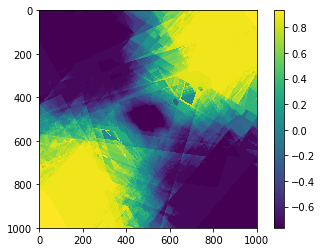

In [13]:
plt.imshow(outputs)
plt.colorbar()

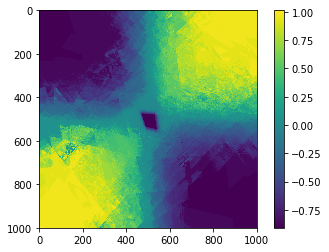

In [32]:
plt.imshow(outputs)
plt.colorbar()

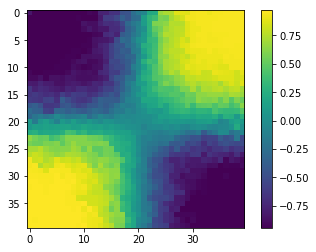

In [2]:
plt.imshow(outputs)
plt.colorbar()

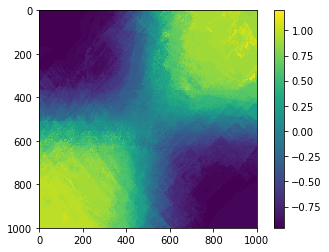

In [3]:
plt.imshow(outputs)
plt.colorbar()

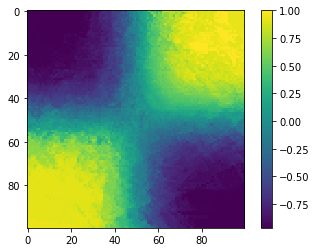

In [9]:
plt.imshow(np.clip(outputs,-1,1))
plt.colorbar()

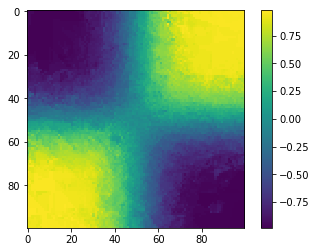

In [15]:
plt.imshow(outputs)
plt.colorbar()

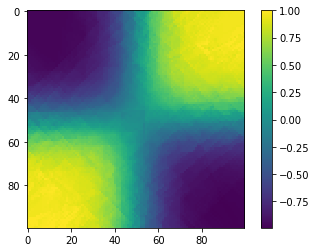

In [43]:
plt.imshow(np.clip(outputs,-1,1))
plt.colorbar()

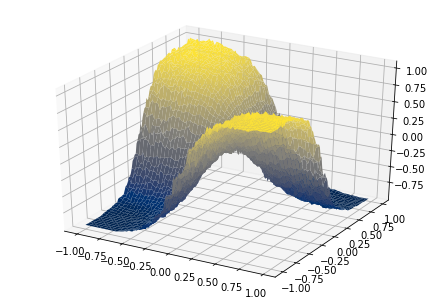

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = Axes3D(figure)

X = np.arange(-1,1,resolution)
Y = np.arange(-1,1,resolution)
X,Y = np.meshgrid(X,Y)

ax.plot_surface(X,Y,outputs,cmap='cividis')

In [41]:
print(net.parameters)
print(list(net.parameters())[4].detach().numpy().shape)

<bound method Module.parameters of Network(
  (my_parameters): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 40x2]
      (1): Parameter containing: [torch.FloatTensor of size 20x40]
      (2): Parameter containing: [torch.FloatTensor of size 10x20]
      (3): Parameter containing: [torch.FloatTensor of size 10x10]
      (4): Parameter containing: [torch.FloatTensor of size ]
      (5): Parameter containing: [torch.FloatTensor of size ]
  )
)>
(10, 20)


In [39]:
40, 2
20, 40
10, 20,


SyntaxError: invalid syntax (<ipython-input-39-922c171f500b>, line 1)